In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
shape = (2167, 2070)
shape = (120,100)
img = np.zeros( shape )

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


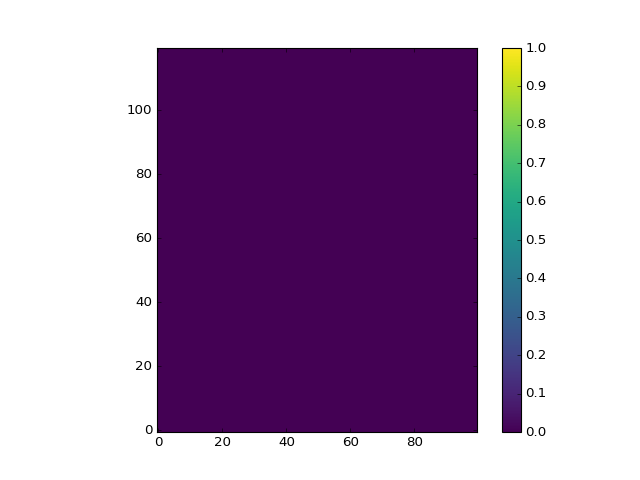

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(img, vmin=0,vmax=1,cmap='viridis', origin = 'lower')
plt.colorbar( im  )

In [11]:
def sphere_form_factor(q, R=2500.):
    qR = q*R
    pq = (4/3.*np.pi)*R**3*( 3*np.sin( qR ) - qR*np.cos(qR)  )/qR**3
    return pq


In [48]:
def sphere_form_factor_2D(img,  R=2500.,center=None, noise=None):
    dimx,dimy = img.shape
    if center is None:center = [dimx/2,dimy/2] 
    #print (center)
    cenx,ceny = center 
    y, x = np.indices( [dimy,dimx] )                                
    y_= y- ceny +1;x_=x-cenx+1 
    q= np.int_( np.hypot(x_, y_)    + 0.5  )                              
                        
    qR = q*R
    pq = (4/3.*np.pi)*R**3*( 3*np.sin( qR ) - qR*np.cos(qR)  )/qR**3
    pq[np.where(q==0)] =0
    return pq


In [49]:
R=2500.  #250 nm
q = np.linspace( 0.001, 0.02,300)
pq2d = sphere_form_factor_2D( img,R)

-c:11: RuntimeWarning: invalid value encountered in true_divide


In [51]:
np.max( pq2d )

623.12422400477408

<IPython.core.display.Javascript object>


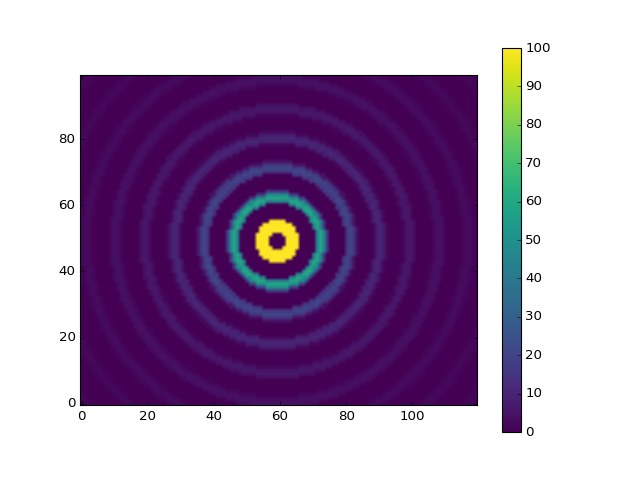

In [47]:
fig, ax = plt.subplots()
im = ax.imshow(pq2d, vmin=0,vmax=1E2,cmap='viridis', 
               origin = 'lower')
plt.colorbar( im  )

In [12]:
R=2500.  #250 nm
q = np.linspace( 0.001, 0.02,300)
pq = sphere_form_factor( q,R)

<IPython.core.display.Javascript object>


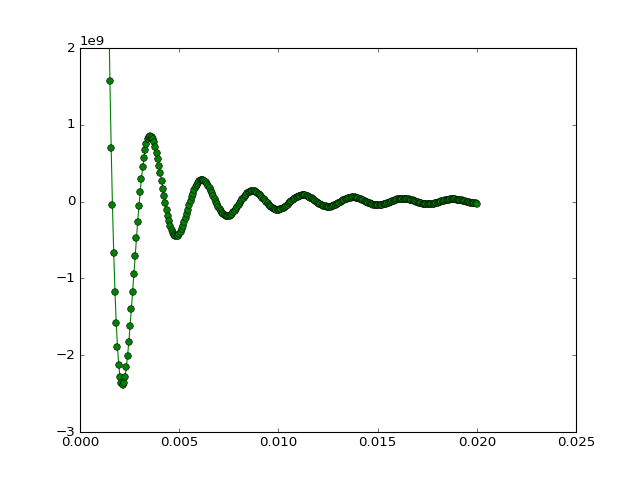

(-3000000000.0, 2000000000.0)

In [13]:

fig, ax = plt.subplots()
ax.plot( q, pq,'go', ls='-')
ax.set_ylim( -.3E10, .2E10)
